In [1]:
import requests
import numpy as np
import json
import pandas as pd
from pprint import pprint

from config import api_key
from matplotlib import pyplot as plt

In [2]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CXUFOODTOTLLB0201M'],"startyear":"2014", "endyear":"2023"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
print(json_data)

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 249, 'message': ['No Data Available for Series CXUFOODTOTLLB0201M Year: 2023'], 'Results': {'series': [{'seriesID': 'CXUFOODTOTLLB0201M', 'data': [{'year': '2022', 'period': 'A01', 'periodName': 'Annual', 'latest': 'true', 'value': '9343', 'footnotes': [{}]}, {'year': '2021', 'period': 'A01', 'periodName': 'Annual', 'value': '8289', 'footnotes': [{}]}, {'year': '2020', 'period': 'A01', 'periodName': 'Annual', 'value': '7310', 'footnotes': [{}]}, {'year': '2019', 'period': 'A01', 'periodName': 'Annual', 'value': '8169', 'footnotes': [{}]}, {'year': '2018', 'period': 'A01', 'periodName': 'Annual', 'value': '7923', 'footnotes': [{}]}, {'year': '2017', 'period': 'A01', 'periodName': 'Annual', 'value': '7729', 'footnotes': [{}]}, {'year': '2016', 'period': 'A01', 'periodName': 'Annual', 'value': '7203', 'footnotes': [{}]}, {'year': '2015', 'period': 'A01', 'periodName': 'Annual', 'value': '7023', 'footnotes': [{}]}, {'year': '2014', 'period': 

In [3]:
for series in json_data['Results']['series']:
    seriesid = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
from pprint  import pprint
pprint(json_data)

{'Results': {'series': [{'data': [{'footnotes': [{}],
                                   'latest': 'true',
                                   'period': 'A01',
                                   'periodName': 'Annual',
                                   'value': '9343',
                                   'year': '2022'},
                                  {'footnotes': [{}],
                                   'period': 'A01',
                                   'periodName': 'Annual',
                                   'value': '8289',
                                   'year': '2021'},
                                  {'footnotes': [{}],
                                   'period': 'A01',
                                   'periodName': 'Annual',
                                   'value': '7310',
                                   'year': '2020'},
                                  {'footnotes': [{}],
                                   'period': 'A01',
                                  

In [4]:
# create DataFrame to hold values
SpendDF = pd.DataFrame(series['data'])
del SpendDF['period']
del SpendDF['latest']
del SpendDF['footnotes']
del SpendDF['periodName']


SpendDF

,year,value
0,2022,9343
1,2021,8289
2,2020,7310
3,2019,8169
4,2018,7923
5,2017,7729
6,2016,7203
7,2015,7023
8,2014,6759


In [5]:
SpendDF.sort_values(by=['year'], inplace=True)
SpendDF

,year,value
8,2014,6759
7,2015,7023
6,2016,7203
5,2017,7729
4,2018,7923
3,2019,8169
2,2020,7310
1,2021,8289
0,2022,9343


In [6]:
SpendDF['value'] = SpendDF['value'].astype(int)
SpendDF.dtypes

year     object
value     int32
dtype: object

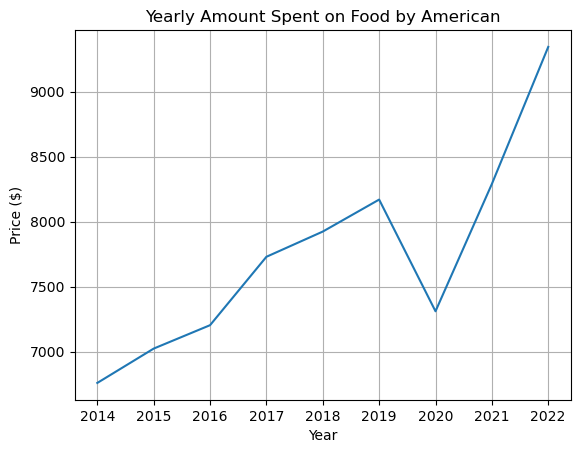

In [7]:
plt.title("Yearly Amount Spent on Food by American")
plt.xlabel("Year")
plt.ylabel("Price ($)")

plt.plot(SpendDF['year'], SpendDF['value'])
plt.yticks()
plt.grid()
plt.show()

In [8]:
SpendDF.to_pickle('SpendDF.pkl')